In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

Loading Dataset

In [2]:
(train_img,train_labels),(test_img,test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


Normalizing

In [3]:
train_img, test_img = train_img/255.0, test_img/255.0

Visualizing

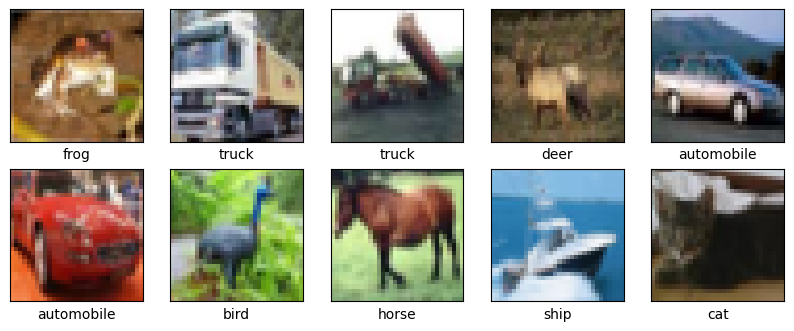

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
train_img.shape

(50000, 32, 32, 3)

Model building

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

Summarization

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

For Output labels

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

Compiling and Training

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img, train_labels, epochs=10,
                    validation_data=(test_img, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.5145 - accuracy: 0.4499 - val_loss: 1.3457 - val_accuracy: 0.5164
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1624 - accuracy: 0.5896 - val_loss: 1.0920 - val_accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0094 - accuracy: 0.6473 - val_loss: 0.9639 - val_accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9129 - accuracy: 0.6796 - val_loss: 0.9398 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8462 - accuracy: 0.7060 - val_loss: 0.8853 - val_accuracy: 0.6939
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7987 - accuracy: 0.7234 - val_loss: 0.8993 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7525 - accuracy: 0.7383 - val_loss: 0.8768 -

Visualizing the accuracy and loss 

313/313 - 3s - loss: 0.8467 - accuracy: 0.7185 - 3s/epoch - 10ms/step


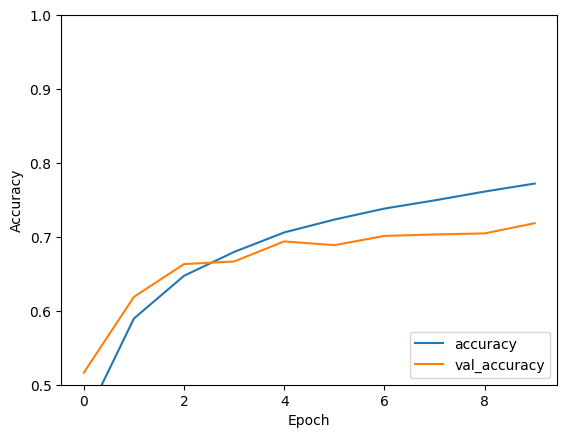

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)

In [14]:
print(test_acc)

0.718500018119812
